In [81]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [82]:
dfYT_train = pd.read_csv('YouTubeCommentsTrain.csv')
dfYT_test = pd.read_csv('YouTubeCommentsTest.csv')

dfYT_train = dfYT_train.sample(frac=1)
dfYT_test = dfYT_test.sample(frac=1)

dfYT_train.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
730,z13fhbspolbawj5tn22bsbw5ynvlt1kku,Paul Crowder,2015-05-27T00:33:53.183000,This Will Always Be My Favorite Song<br />But ...,0
547,z13utrmbosiawt10p22kextrikr0fprhh04,Tiny Tim,2014-10-11T02:28:19,What does that tattoo on her right tricep say?﻿,0
1007,z12expkpjuvlf1b0q23rcjwhlum4s5xym04,Victoria Morales,2015-02-08T05:34:28.216000,Check out this video on YouTube:﻿,1
491,z12ltv24dmert1m1k23ajhgo4kydixwnf,Mohammad Abdelhafez,2014-09-20T12:33:21,Hey guys subscribe to my channel for no reason...,1
939,z12hsxrbio20xj1x504cfrsylnzmwlcx4i0,Wayne Jackson,2015-04-15T11:00:09.313000,Check out this video on YouTube:﻿,1


In [83]:
dfYT_train = dfYT_train.drop(['COMMENT_ID', 'AUTHOR','DATE'], axis = 1)
dfYT_test = dfYT_test.drop(['COMMENT_ID', 'AUTHOR','DATE'], axis = 1)

dfYT_train.head()

,CONTENT,CLASS
730,This Will Always Be My Favorite Song<br />But ...,0
547,What does that tattoo on her right tricep say?﻿,0
1007,Check out this video on YouTube:﻿,1
491,Hey guys subscribe to my channel for no reason...,1
939,Check out this video on YouTube:﻿,1


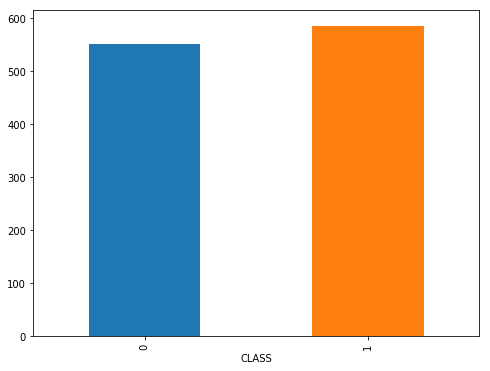

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
dfYT_train.groupby('CLASS').CONTENT.count().plot.bar(ylim=0)
plt.show()

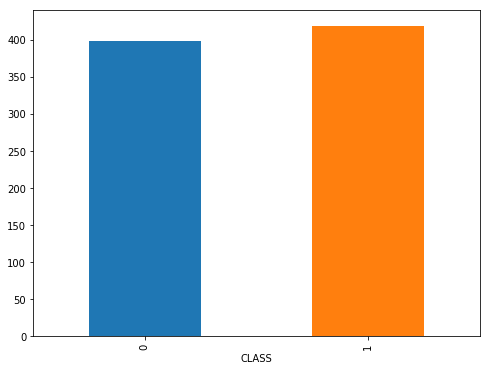

In [85]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
dfYT_test.groupby('CLASS').CONTENT.count().plot.bar(ylim=0)
plt.show()

In [86]:
def fit_and_predict(nome, modelo):
    text_clf = Pipeline([('vect', CountVectorizer(stop_words='english')), ('tfidf', TfidfTransformer()), 
                     ('clfNB', modelo)])
    text_clf = text_clf.fit(dfYT_train.CONTENT, dfYT_train.CLASS)
    predicted = text_clf.predict(dfYT_test.CONTENT)
    accuracy = np.mean(predicted == dfYT_test.CLASS)
    
    print('Acuracia %s: %.2f' % (nome, (accuracy * 100)))

In [87]:
from sklearn.naive_bayes import MultinomialNB

modeloMNB = MultinomialNB()
resultadoMNB = fit_and_predict('MultinomialNB',modeloMNB)

Acuracia MultinomialNB: 85.33


In [88]:
from sklearn.ensemble import RandomForestClassifier

modeloRandom = RandomForestClassifier()
resultadoMNB = fit_and_predict('RandomForestClassifier',modeloRandom)

Acuracia RandomForestClassifier: 90.59


In [89]:
from sklearn.svm import LinearSVC

modeloLinear = LinearSVC()
resultadoMNB = fit_and_predict('LinearSVC',modeloLinear)

Acuracia LinearSVC: 93.03


In [90]:
from sklearn.linear_model import LogisticRegression

modeloLR = LogisticRegression()
resultadoMNB = fit_and_predict('LogisticRegression',modeloLR)

Acuracia LogisticRegression: 90.83
